<a href="https://colab.research.google.com/github/mc40in/Smart_Grid_Tech_LABA/blob/main/Laba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Розрахунок балансу електричної енергії при комбінованому живленні.**

In [ ]:
# Блок 1: Введення даних
import matplotlib.pyplot as plt
import numpy as np

def get_user_input():
    print("Введіть параметри для аналізу даних:")

    # Споживання енергії за графіком навантаження по добі
    print("Введіть споживання електричної енергії у (кВт) для кожної із 3 годин:")
    consumption_intervals = []
    for i in range(8):
        consumption_intervals.append(float(input(f"Інтервал {i + 1} (годин {i * 3}-{(i + 1) * 3}): ")))

    # Введення потужності сонячної установки
    solar_capacity = float(input("Введіть номінальну потужність сонячної батареї (кВт): "))

    # Вибір пори року для генерації енергії
    print("Оберіть сезон для розрахунку:")
    print("1 - Зима")
    print("2 - Весна")
    print("3 - Літо")
    print("4 - Осінь")
    season = int(input("Введіть номер необхідного сезону генерації: "))

    # Генерація енергії за умовною залежністю від пори року та потужності установки
    if season == 1:  # Winter
        production_intervals = [solar_capacity * f for f in [0, 0, 0, 0.2, 0.6, 0.4, 0.2, 0]]
    elif season == 2:  # Spring
        production_intervals = [solar_capacity * f for f in [0, 0.1, 0.3, 0.7, 0.9, 0.8, 0.5, 0.1]]
    elif season == 3:  # Summer
        production_intervals = [solar_capacity * f for f in [0, 0.1, 0.4, 0.8, 0.9, 0.9, 0.6, 0.1]]
    elif season == 4:  # Autumn
        production_intervals = [solar_capacity * f for f in [0, 0, 0.2, 0.6, 0.8, 0.7, 0.4, 0.0]]
    else:
        print("Невірно введено сезон. Встановлено сезон за замовчуванням Зима.")
        production_intervals = [solar_capacity * f for f in [0, 0, 0, 0.2, 0.6, 0.4, 0.2, 0]]

    return {
        'consumption_intervals': consumption_intervals,
        'production_intervals': production_intervals,
        'solar_capacity': solar_capacity
    }

variant = get_user_input()


Введіть параметри для аналізу даних:
Введіть споживання електричної енергії у (кВт) для кожної із 3 годин:
Інтервал 1 (годин 0-3): 4
Інтервал 2 (годин 3-6): 5
Інтервал 3 (годин 6-9): 3
Інтервал 4 (годин 9-12): 5
Інтервал 5 (годин 12-15): 7
Інтервал 6 (годин 15-18): 6
Інтервал 7 (годин 18-21): 4
Інтервал 8 (годин 21-24): 4
Введіть номінальну потужність сонячної батареї (кВт): 12
Оберіть сезон для розрахунку:
1 - Зима
2 - Весна
3 - Літо
4 - Осінь
Введіть номер необхідного сезону генерації: 1


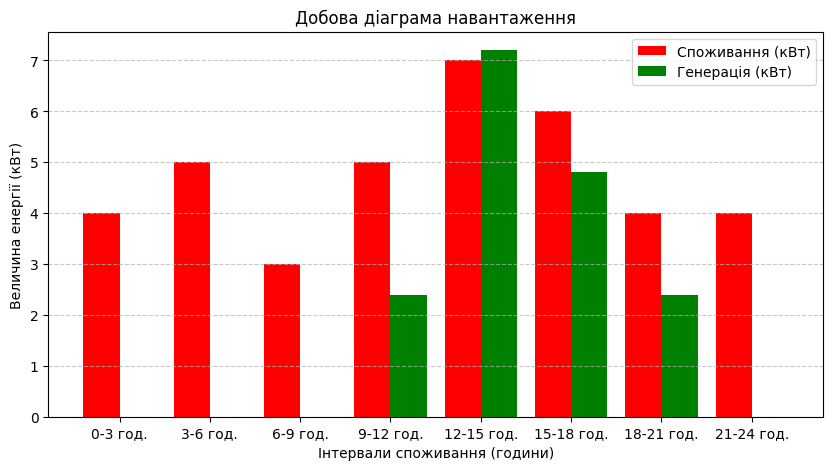


Результати розрахунку:
Загальне споживання (кВт): 38.0
Загальна генерація (кВт): 16.8
Енергетичний баланс (кВт): -21.2
Середне споживання енергії (кВт): 4.75
Середня генерація енергії (кВт): 2.1


In [ ]:
# Блок 2: Розрахунки та побудова графіків
def analyze_energy_flow(variant):
    # Дані варіанта
    consumption_intervals = variant['consumption_intervals']  # Споживання енергії
    production_intervals = variant['production_intervals']  # Виробництво енергії

    # Розрахунки
    total_consumption = sum(consumption_intervals)
    total_production = sum(production_intervals)
    balance = total_production - total_consumption  # Баланс енергії

    # Розрахунок середньої потужності
    average_consumption_power = total_consumption / len(consumption_intervals)
    average_production_power = total_production / len(production_intervals)

    # Побудова стовпчастої діаграми
    time_labels = [f'{i * 3}-{(i + 1) * 3} год.' for i in range(8)]
    x = np.arange(len(time_labels))  # Позиції для стовпців

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, consumption_intervals, width=0.4, label='Споживання (кВт)', color='red')
    plt.bar(x + 0.2, production_intervals, width=0.4, label='Генерація (кВт)', color='green')
    plt.title('Добова діаграма навантаження')
    plt.xlabel('Інтервали споживання (години)')
    plt.ylabel('Величина енергії (кВт)')
    plt.xticks(x, time_labels)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Результати аналізу
    return {
        'Загальне споживання (кВт)': total_consumption,
        'Загальна генерація (кВт)': total_production,
        'Енергетичний баланс (кВт)': balance,
        'Середне споживання енергії (кВт)': average_consumption_power,
        'Середня генерація енергії (кВт)': average_production_power
    }

if variant:
    result = analyze_energy_flow(variant)
    print("\nРезультати розрахунку:")
    for key, value in result.items():
        print(f"{key}: {value}")


In [ ]:
# Блок 3: Аналіз балансу енергії

# Загальне споживання та генерація за добу
total_consumption = result['Загальне споживання (кВт)']
total_production = result['Загальна генерація (кВт)']

# Розрахунок енергетичного балансу
energy_balance = total_production - total_consumption

# Визначення меж для 10% від загального споживання
threshold = 0.1 * total_consumption

# Визначення рекомендацій
if energy_balance < -threshold:
    # Якщо є дефіцит
    deficit = abs(energy_balance)
    print("\nРезультати блоку 3:")
    print(f"Загальне споживання: {total_consumption:.2f} кВт·год")
    print(f"Загальна генерація: {total_production:.2f} кВт·год")
    print(f"Дефіцит енергії: {deficit:.2f} кВт·год")
    print(f"Рекомендація: Збільшити кількість сонячних панелей.")
elif energy_balance > threshold:
    # Якщо є профіцит
    surplus = energy_balance
    print("\nРезультати блоку 3:")
    print(f"Загальне споживання: {total_consumption:.2f} кВт·год")
    print(f"Загальна генерація: {total_production:.2f} кВт·год")
    print(f"Профіцит енергії: {surplus:.2f} кВт·год")
    print(f"Рекомендація: Встановити додатковий акумулятор.")
else:
    # Якщо баланс у межах норми (в межах 10%)
    print("\nРезультати блоку 3:")
    print(f"Загальне споживання: {total_consumption:.2f} кВт·год")
    print(f"Загальна генерація: {total_production:.2f} кВт·год")
    print("Баланс системи у межах 10 %.")



Результати блоку 3:
Загальне споживання: 38.00 кВт·год
Загальна генерація: 16.80 кВт·год
Дефіцит енергії: 21.20 кВт·год
Рекомендація: Збільшити кількість сонячних панелей.


In [ ]:
# Блок 4: Економічний аналіз
def economic_analysis(variant, result):
    total_consumption = result['Total Consumption (kWh)']
    total_production = result['Total Production (kWh)']

    # Введення вартості енергії
    grid_price = float(input("Enter the price of energy from the grid (UAH/kWh): "))
    solar_price = float(input("Enter the price of solar energy (UAH/kWh): "))

    # Розрахунок витрат
    grid_energy = max(total_consumption - total_production, 0)  # Енергія з мережі
    solar_energy = min(total_production, total_consumption)  # Використана сонячна енергія

    grid_cost = grid_energy * grid_price
    solar_cost = solar_energy * solar_price
    total_cost = grid_cost + solar_cost

    # Економічна ефективність
    cost_with_grid_only = total_consumption * grid_price
    savings = cost_with_grid_only - total_cost

    print("\nEconomic Analysis Results:")
    print(f"Grid Energy (kWh): {grid_energy:.2f}")
    print(f"Solar Energy (kWh): {solar_energy:.2f}")
    print(f"Grid Cost (UAH): {grid_cost:.2f}")
    print(f"Solar Cost (UAH): {solar_cost:.2f}")
    print(f"Total Cost (UAH): {total_cost:.2f}")
    print(f"Cost with Grid Only (UAH): {cost_with_grid_only:.2f}")
    print(f"Savings (UAH): {savings:.2f}")

if variant and result:
    economic_analysis(variant, result)

Enter the price of energy from the grid (UAH/kWh): 3
Enter the price of solar energy (UAH/kWh): 1

Economic Analysis Results:
Grid Energy (kWh): 3.00
Solar Energy (kWh): 35.00
Grid Cost (UAH): 9.00
Solar Cost (UAH): 35.00
Total Cost (UAH): 44.00
Cost with Grid Only (UAH): 114.00
Savings (UAH): 70.00
